In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import time as time
from importlib import reload
from tabulate import tabulate
import warnings
warnings.filterwarnings("ignore")

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB, ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


from sklearn.metrics import roc_curve, roc_auc_score, auc, accuracy_score, make_scorer
from sklearn.feature_selection import SelectKBest, chi2, f_classif

'''install extra modeules if needed'''
# !pip install xgboost
from xgboost import XGBClassifier
# !pip install lightgbm
# !pip install catboost
import lightgbm as lgb
import catboost as cb
# !pip install rgf_python
from rgf.sklearn import RGFClassifier, FastRGFClassifier

# import functions from scripts
import sys
path = os.getcwd()
sys.path.append(path+'/scripts')
import param_grids
from make_model_6 import make_model

In [2]:
data = path + '/dataset/bank/bank-additional/bank-additional-full.csv'
df_orig = pd.read_csv(data, sep=';')
df = df_orig.copy()
df = df.drop_duplicates()
df_copy = df.copy()

## All Models

In [3]:
models = [LogisticRegression(), SGDClassifier(), SVC(), KNeighborsClassifier() , 
          DecisionTreeClassifier(), GaussianNB(), ComplementNB()]
model_names = ['Logistic Regression', 'SGD Classifier', 'SVC', 
               'KNN', 'Decision Tree', 'Gaussian NB', 'Complement NB']
import param_grids
reload(param_grids)
params = [param_grids.param_lr, param_grids.param_sgd, param_grids.param_svc, 
               param_grids.param_knn, param_grids.param_dt, param_grids.param_nb, param_grids.param_cnb]

Logistic Regression
Tuned Hyperparameters : {'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Accuracy : 0.9379700831406481
Training Time : 2 minutes
Test Score : 0.9321625132985981


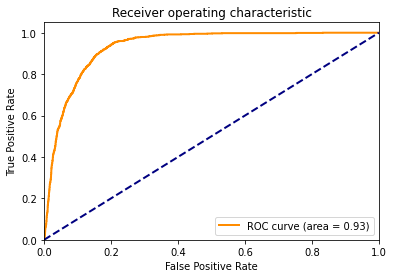

Confusion Matrix:
[[6586  679]
 [ 250  721]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      7265
           1       0.52      0.74      0.61       971

    accuracy                           0.89      8236
   macro avg       0.74      0.82      0.77      8236
weighted avg       0.91      0.89      0.90      8236

#########################################################
SGD Classifier
Tuned Hyperparameters : {'classifier__alpha': 0.001, 'classifier__loss': 'log', 'classifier__penalty': 'none'}
Accuracy : 0.9374459069390738
Training Time : 1 minutes
Test Score : 0.9319709993103511


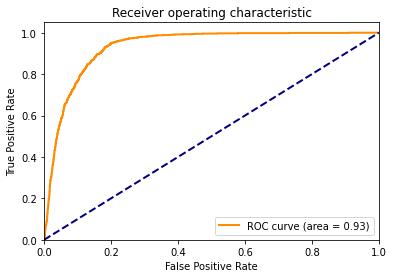

Confusion Matrix:
[[6539  726]
 [ 228  743]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      7265
           1       0.51      0.77      0.61       971

    accuracy                           0.88      8236
   macro avg       0.74      0.83      0.77      8236
weighted avg       0.91      0.88      0.89      8236

#########################################################
SVC
Tuned Hyperparameters : {'classifier__C': 1, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf'}
Accuracy : 0.939747264986322
Training Time : 12 minutes
Test Score : 0.9355183316877683


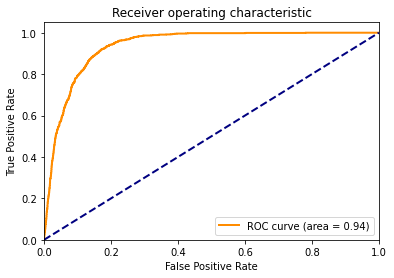

Confusion Matrix:
[[6405  860]
 [ 170  801]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.93      7265
           1       0.48      0.82      0.61       971

    accuracy                           0.87      8236
   macro avg       0.73      0.85      0.77      8236
weighted avg       0.92      0.87      0.89      8236

#########################################################
KNN
Tuned Hyperparameters : {'classifier__algorithm': 'auto', 'classifier__leaf_size': 30, 'classifier__n_neighbors': 7, 'classifier__p': 2, 'classifier__weights': 'uniform'}
Accuracy : 0.9112406839055481
Training Time : 3 minutes
Test Score : 0.9027924043652715


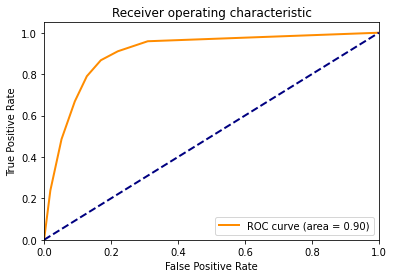

Confusion Matrix:
[[6337  928]
 [ 204  767]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      7265
           1       0.45      0.79      0.58       971

    accuracy                           0.86      8236
   macro avg       0.71      0.83      0.75      8236
weighted avg       0.91      0.86      0.88      8236

#########################################################
Decision Tree
Tuned Hyperparameters : {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 15, 'classifier__min_samples_split': 100}
Accuracy : 0.9372683759208617
Training Time : 3 minutes
Test Score : 0.9340849536772884


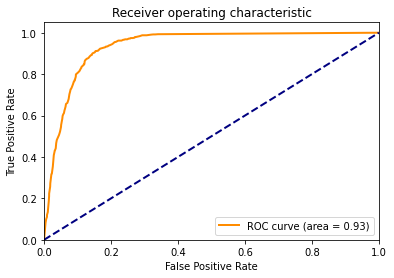

Confusion Matrix:
[[6498  767]
 [ 180  791]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      7265
           1       0.51      0.81      0.63       971

    accuracy                           0.89      8236
   macro avg       0.74      0.85      0.78      8236
weighted avg       0.92      0.89      0.90      8236

#########################################################
Gaussian NB
Tuned Hyperparameters : {'classifier__var_smoothing': 1.0}
Accuracy : 0.8691884382916859
Training Time : 0 minutes
Test Score : 0.8634180639792808


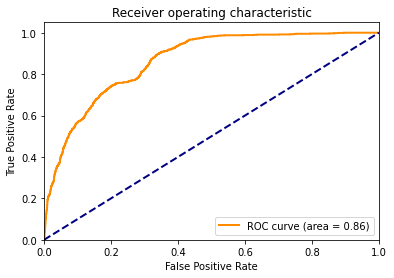

Confusion Matrix:
[[6933  332]
 [ 611  360]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      7265
           1       0.52      0.37      0.43       971

    accuracy                           0.89      8236
   macro avg       0.72      0.66      0.68      8236
weighted avg       0.87      0.89      0.88      8236

#########################################################
Complement NB
Tuned Hyperparameters : {'classifier__alpha': 1e-05}
Accuracy : 0.7852989299625601
Training Time : 0 minutes
Test Score : 0.787443430014112


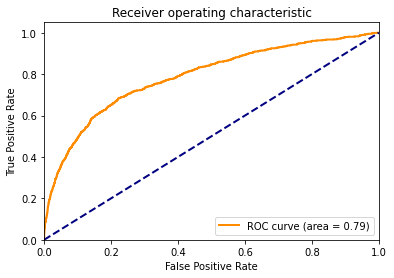

Confusion Matrix:
[[5667 1598]
 [ 314  657]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.78      0.86      7265
           1       0.29      0.68      0.41       971

    accuracy                           0.77      8236
   macro avg       0.62      0.73      0.63      8236
weighted avg       0.87      0.77      0.80      8236

#########################################################


In [4]:
# reload(param_grids)
# import make_model_6
# reload(make_model_6)
# from make_model_6 import make_model

random_state = 42
folds = 5
resampling = [0.2, 0.5]     # over size for SMOTE and under size for RandomUnderSampler
# resampling = None                            # Try None for no resampling

df = df_copy.copy()

for model, model_name, parameters in zip(models, model_names, params):
        print(model_name)
        clf_grid, time, test_score, metrics_df = make_model(df, model, parameters, 
                                                            test_size=0.2, folds=folds,
                                                            resampling=resampling)

        # save the model to disk
        pickle.dump(clf_grid, open(f'pres_models/{model_name}.pkl', 'wb'))

        info_file = f'pres_models/{model_name}_info.txt'

        with open(info_file, 'w') as f:
                # Write the tuned hyperparameters and accuracy to file
                f.write(f"Tuned Hyperparameters: {clf_grid.best_params_}\n")
                f.write(f"Accuracy: {clf_grid.best_score_}\n")
                # Write training time in minutes to file
                f.write(f"Training Time: {time} minutes\n")
                f.write(f"Test Score: {test_score}\n")
                f.write(f"Metrics: {metrics_df}\n")

        metrics_file = f'pres_models/{model_name}_metrics.csv'
        # Save the metrics dataframe to a CSV file
        metrics_df.to_csv(metrics_file, index=False)

## Decision Trees

In [5]:
models = [
    DecisionTreeClassifier(),
    RandomForestClassifier(n_jobs=-1),
    AdaBoostClassifier(),
    XGBClassifier(n_jobs=-1),
    BaggingClassifier(n_jobs=-1),
    lgb.LGBMClassifier(n_jobs=-1),
    cb.CatBoostClassifier(silent=True),
    ExtraTreesClassifier(n_jobs=-1),
    RGFClassifier(),
]
model_names = ['DecisionTree', 'RandomForest', 'AdaBoost', 'XGBoost', 
               'BaggingClassifier', 'LGBMClassifier', 'CatBoostClassifier', 
               'ExtraTreesClassifier', 'RGFClassifier']

import param_grids
reload(param_grids)
params = [param_grids.param_dt, param_grids.param_rf, param_grids.param_ada,
                param_grids.param_xgb, param_grids.param_bag, param_grids.param_lgbm,
                param_grids.param_cat, param_grids.param_extra, param_grids.param_rgf]

DecisionTree
Tuned Hyperparameters : {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 15, 'classifier__min_samples_split': 100}
Accuracy : 0.9371627226982145
Training Time : 3 minutes
Test Score : 0.9352448111545911


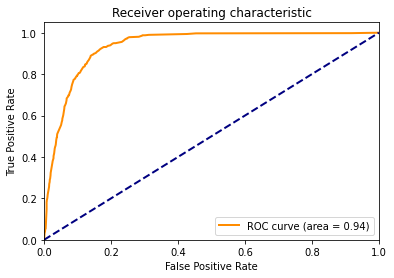

Confusion Matrix:
[[6468  797]
 [ 179  792]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      7265
           1       0.50      0.82      0.62       971

    accuracy                           0.88      8236
   macro avg       0.74      0.85      0.77      8236
weighted avg       0.92      0.88      0.89      8236

#########################################################
RandomForest
Tuned Hyperparameters : {'classifier__max_depth': 30, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10}
Accuracy : 0.9446656792296781
Training Time : 1 minutes
Test Score : 0.9403355251360338


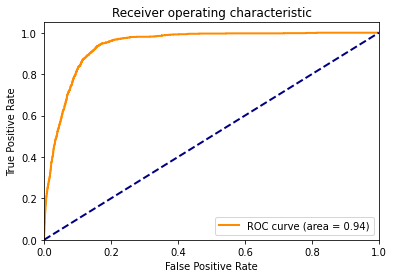

Confusion Matrix:
[[6584  681]
 [ 196  775]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      7265
           1       0.53      0.80      0.64       971

    accuracy                           0.89      8236
   macro avg       0.75      0.85      0.79      8236
weighted avg       0.92      0.89      0.90      8236

#########################################################
AdaBoost
Tuned Hyperparameters : {'classifier__base_estimator': DecisionTreeClassifier(max_depth=1), 'classifier__n_estimators': 300}
Accuracy : 0.9402186818327547
Training Time : 2 minutes
Test Score : 0.9374498445277819


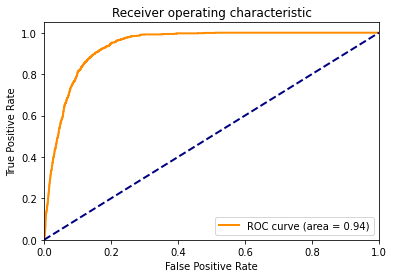

Confusion Matrix:
[[6754  511]
 [ 304  667]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      7265
           1       0.57      0.69      0.62       971

    accuracy                           0.90      8236
   macro avg       0.76      0.81      0.78      8236
weighted avg       0.91      0.90      0.91      8236

#########################################################
XGBoost
[22:12:43] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[22:12:43] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[22:12:44] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { 

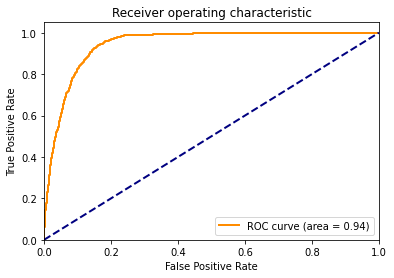

Confusion Matrix:
[[6628  637]
 [ 207  764]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      7265
           1       0.55      0.79      0.64       971

    accuracy                           0.90      8236
   macro avg       0.76      0.85      0.79      8236
weighted avg       0.92      0.90      0.91      8236

#########################################################
BaggingClassifier
Tuned Hyperparameters : {'classifier__base_estimator': LogisticRegression(C=1, solver='liblinear'), 'classifier__n_estimators': 300}
Accuracy : 0.937452590620009
Training Time : 1 minutes
Test Score : 0.9325322160975232


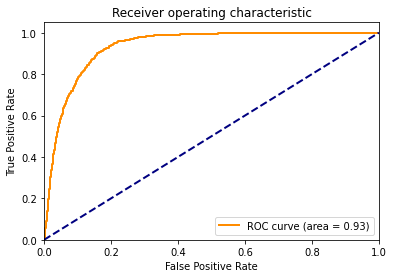

Confusion Matrix:
[[6610  655]
 [ 254  717]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94      7265
           1       0.52      0.74      0.61       971

    accuracy                           0.89      8236
   macro avg       0.74      0.82      0.77      8236
weighted avg       0.91      0.89      0.90      8236

#########################################################
LGBMClassifier
Tuned Hyperparameters : {'classifier__boosting_type': 'dart', 'classifier__reg_alpha': 0.001, 'classifier__reg_lambda': 1e-06}
Accuracy : 0.9499702179077476
Training Time : 2 minutes
Test Score : 0.9486039395745723


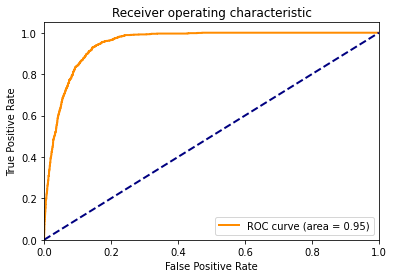

Confusion Matrix:
[[6503  762]
 [ 146  825]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.93      7265
           1       0.52      0.85      0.65       971

    accuracy                           0.89      8236
   macro avg       0.75      0.87      0.79      8236
weighted avg       0.92      0.89      0.90      8236

#########################################################
CatBoostClassifier
Tuned Hyperparameters : {'classifier__depth': 4, 'classifier__l2_leaf_reg': 3}
Accuracy : 0.9492272346480073
Training Time : 5 minutes
Test Score : 0.9472337144003351


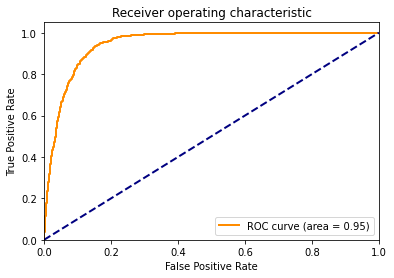

Confusion Matrix:
[[6623  642]
 [ 197  774]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      7265
           1       0.55      0.80      0.65       971

    accuracy                           0.90      8236
   macro avg       0.76      0.85      0.79      8236
weighted avg       0.92      0.90      0.91      8236

#########################################################
ExtraTreesClassifier
Tuned Hyperparameters : {'classifier__class_weight': None, 'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 300}
Accuracy : 0.9273178333401211
Training Time : 20 minutes
Test Score : 0.9239704351166625


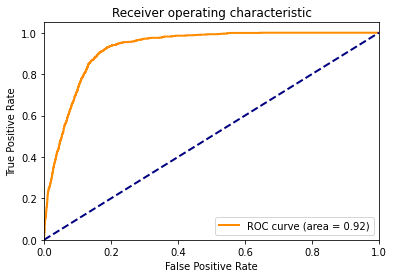

Confusion Matrix:
[[6685  580]
 [ 355  616]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      7265
           1       0.52      0.63      0.57       971

    accuracy                           0.89      8236
   macro avg       0.73      0.78      0.75      8236
weighted avg       0.90      0.89      0.89      8236

#########################################################
RGFClassifier
Tuned Hyperparameters : {'classifier__algorithm': 'RGF', 'classifier__max_leaf': 2000}
Accuracy : 0.9472274529680835
Training Time : 7 minutes
Test Score : 0.9453391293130516


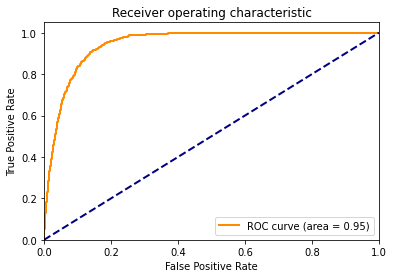

Confusion Matrix:
[[6593  672]
 [ 185  786]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      7265
           1       0.54      0.81      0.65       971

    accuracy                           0.90      8236
   macro avg       0.76      0.86      0.79      8236
weighted avg       0.92      0.90      0.90      8236

#########################################################


In [6]:
import make_model_6
reload(make_model_6)
from make_model_6 import make_model

random_state = 42
folds = 5
resampling = [0.2, 0.5]     # over size for SMOTE and under size for RandomUnderSampler
# resampling = None                            # Try None for no resampling

df = df_copy.copy()

for model, model_name, parameters in zip(models, model_names, params):
        print(model_name)
        clf_grid, time, test_score, metrics_df = make_model(df, model, parameters, 
                                                            test_size=0.2, folds=folds,
                                                            resampling=resampling)

        # save the model to disk
        pickle.dump(clf_grid, open(f'pres_models/{model_name}.pkl', 'wb'))

        info_file = f'pres_models/{model_name}_info.txt'

        with open(info_file, 'w') as f:
                # Write the tuned hyperparameters and accuracy to file
                f.write(f"Tuned Hyperparameters: {clf_grid.best_params_}\n")
                f.write(f"Accuracy: {clf_grid.best_score_}\n")
                # Write training time in minutes to file
                f.write(f"Training Time: {time} minutes\n")
                f.write(f"Test Score: {test_score}\n")
                f.write(f"Metrics: {metrics_df}\n")

        metrics_file = f'pres_models/{model_name}_metrics.csv'
        # Save the metrics dataframe to a CSV file
        metrics_df.to_csv(metrics_file, index=False)